# **Project 1 AUTOENCODERS**
**DEEP LEARNING**


### Dataset

Our dataset comes from 100 images of glasses taken from diverse websites

In [1]:
# libraries
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random

from peewee import ModelDelete
from sklearn.model_selection import train_test_split
import numpy as np

Total images: 1000
All images resized to: (32, 32)


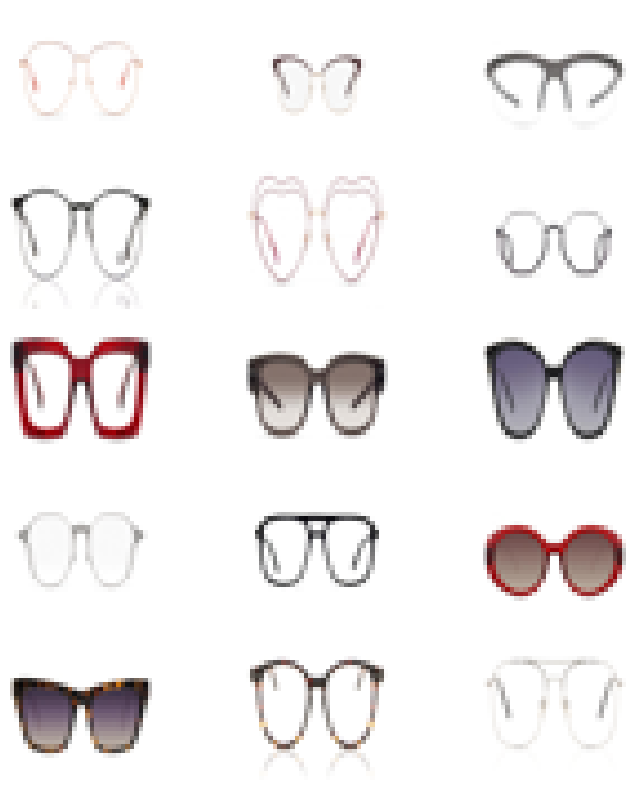

In [6]:
# getting the images
data_dir = Path("../data/raw")
image_paths = image_paths = (
    list(data_dir.glob("*.jpeg")) +
    list(data_dir.glob("*.jpg"))
)
print("Total images:", len(image_paths))

# target size
SIZE = (32, 32)

# resize all images into a list
images_resized = [Image.open(p).resize(SIZE) for p in image_paths]

print("All images resized to:", SIZE)

# show sample
sample = random.sample(images_resized, 15)

fig, axes = plt.subplots(5, 3, figsize=(8, 8))
axes = axes.flatten()

for ax, img in zip(axes, sample):
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

**Train Test and Validation Split**

The resized images are converted to a NumPy array and split into 80% training, 10% validation, and 10% test sets with a fixed random_state for reproducibility. For our experiments, the training set learns the latent representation, the validation set tunes and monitors the model, and the test set evaluates final performance.

In [7]:
#Train test and validation split

# Convert the list of images to a NumPy array for splitting
images_np = np.array(images_resized)

# First split: 80% for training, 20% for (test + validation)
X_train, X_test_val = train_test_split(images_np, test_size=0.2, random_state=42)

# Second split: 50% of X_test_val for test, 50% for validation (which is 10% each of original data)
X_test, X_val = train_test_split(X_test_val, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Validation set size: {len(X_val)}")

Training set size: 800
Test set size: 100
Validation set size: 100


**Normalization**

We are converting the image arrays to `float32` and normalizing them by dividing by 255, since RGB color images have pixel values ranging from 0 to 255. This scales the data to the [0, 1] range, which improves numerical stability and helps the autoencoder train more efficiently.

In [8]:
#Normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

print(f"X_train shape: {X_train.shape}")  # (80, 256, 256, 3)
print(f"X_test shape: {X_test.shape}")    # (10, 256, 256, 3)
print(f"X_val shape: {X_test.shape}")    # (10, 256, 256, 3)
print(f"Min: {X_train.min()}, Max: {X_train.max()}")

X_train shape: (800, 32, 32, 3)
X_test shape: (100, 32, 32, 3)
X_val shape: (100, 32, 32, 3)
Min: 0.0, Max: 1.0


### Model 1
**Simple Autoencoder**

## Model x
**Denoising Autoencoder**

## Model x
**Convolutional Autoencoder**

## Model x
**Variational Autoencoder**